<a href="https://colab.research.google.com/github/ZackAkil/practical-machine-learning-literacy/blob/master/4_Hand_writing_Overfitting_Practical_ML_Literacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand writing Overfitting Mnist

⚠️ Due to time limitations we can't go over how all of the code in the noetbook works.

If you'd like to learn more about deep learning and neural networks I recommend [this book](https://www.amazon.co.uk/Deep-Learning-Python-Francois-Chollet/dp/1617294438) or [this course](https://www.coursera.org/specializations/deep-learning) by Andrew Ng.

In [0]:
# import packages (mostly Keras)

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# load in data

batch_size = 128
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples




Output/Target label  5


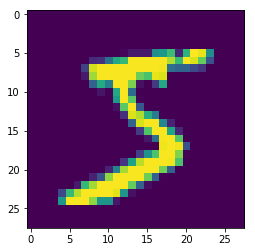



Output/Target label  0


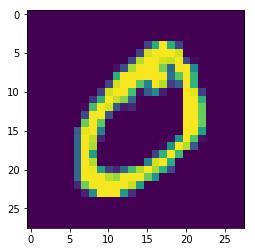



Output/Target label  4


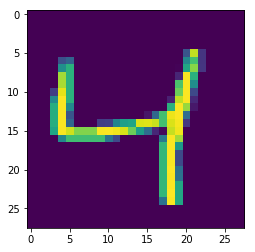



Output/Target label  1


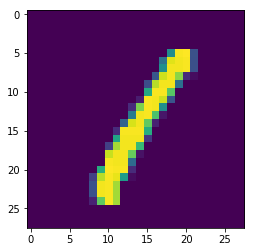



Output/Target label  9


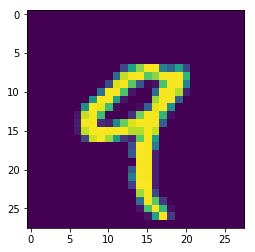



Output/Target label  2


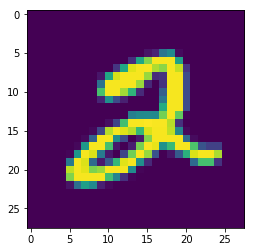



Output/Target label  1


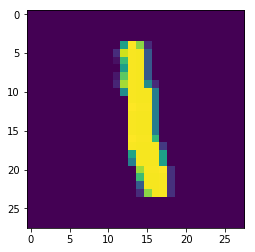



Output/Target label  3


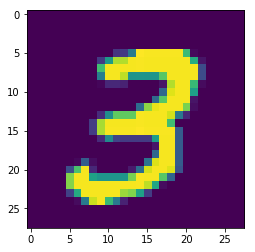



Output/Target label  1


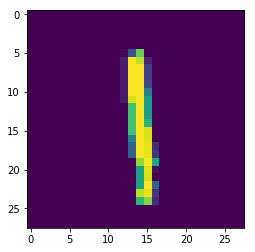



Output/Target label  4


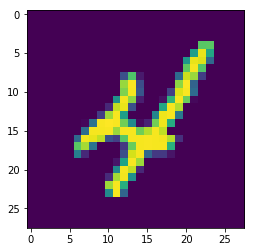

In [0]:
for i in range(10):
  img = x_train[i,:,:,0]
  
  # get prediction from our model
  label = y_train[i]
  print("\n\nOutput/Target label ", label.argmax())
  
  # display image   
  plt.imshow(img)
  plt.show()

## The next cell is where you select how much data to train with
Play around with these to see how it affects the models performance.

In [0]:
number_of_training_rows = 10

# number_of_training_rows = 100

# number_of_training_rows = 1000

# number_of_training_rows = 10000

In [0]:
model = Sequential()
model.add(Conv2D(62, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(62, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
# train the model
model.fit(x_train[:number_of_training_rows], y_train[:number_of_training_rows],
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

print('\n\nLet\'s look at the final performance/accuracy:' )

# after training get the final model scores
score = model.evaluate(x_train[:number_of_training_rows], y_train[:number_of_training_rows], verbose=0)
print('Train accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Train on 10 samples, validate on 10000 samples
Epoch 1/10
10/10 [==============================] - 1s 84ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 2.7044 - val_acc: 0.4070
Epoch 2/10
10/10 [==============================] - 1s 72ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.7473 - val_acc: 0.4072
Epoch 3/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.7846 - val_acc: 0.4075
Epoch 4/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.8179 - val_acc: 0.4070
Epoch 5/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 2.8480 - val_acc: 0.4068
Epoch 6/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.8752 - val_acc: 0.4066
Epoch 7/10
10/10 [==============================] - 1s 74ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.9001 - val_acc: 0.4065
Epoch 8/10
10/10 [==================

## Let's look at some predictions 



Predicted  3


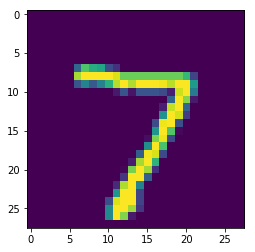



Predicted  1


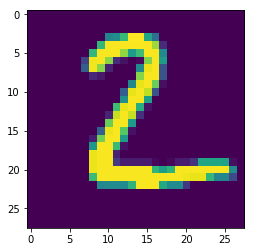



Predicted  1


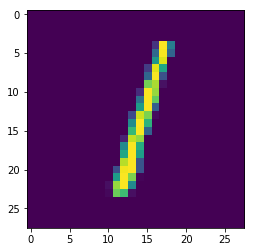



Predicted  0


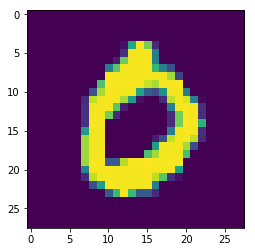



Predicted  4


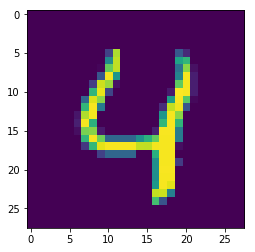



Predicted  1


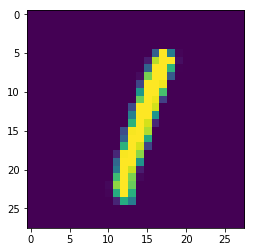



Predicted  9


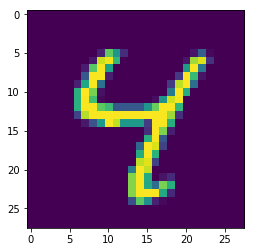



Predicted  9


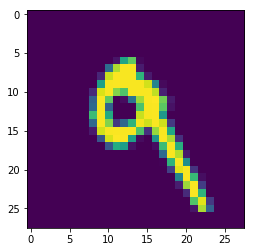



Predicted  4


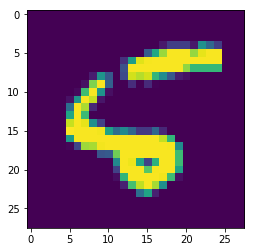



Predicted  9


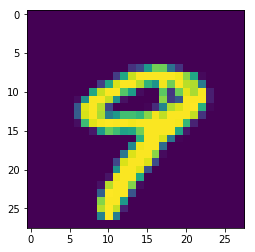

In [0]:
for i in range(10):
  img = x_test[i,:,:,0]
  
  # get prediction from our model
  pred = model.predict_classes(x_test[i:i+1])
  print("\n\nPredicted ", pred[0])
  
  # display image   
  plt.imshow(img)
  plt.show()